In [0]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [0]:
iris = datasets.load_iris()

In [3]:
iris.data[1]

array([4.9, 3. , 1.4, 0.2])

In [4]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [0]:
# loading sklearn dataset as pandas dataset
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [0]:
# converting the target column to give species names
def species(col):
    if col == 0:
        spec = 'setosa'
    elif col ==1:
        spec='versicolor'
    else: spec = 'virginica'
    return spec

# applying the species function to pandas column
df['species'] = df['target'].apply(species)

# dropping the target column
df.drop(columns = 'target',inplace = True)

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## **Exploratory Data Analysis**

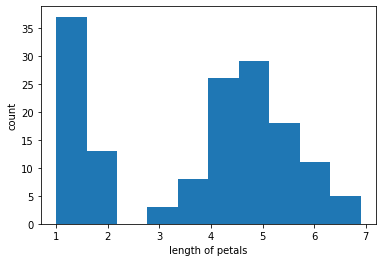

In [9]:
# plotting the sepal length using matplotlib
plt.hist(df['petal length (cm)'])
plt.xlabel('length of petals')
plt.ylabel('count')
plt.show()

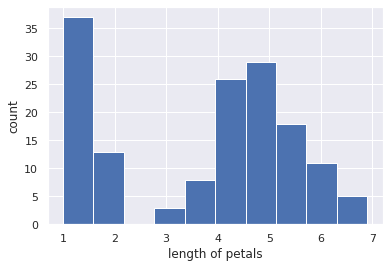

In [10]:
# setting seaborn styling to matplotlib plots
sns.set()
plt.hist(df['petal length (cm)'])
plt.xlabel('length of petals')
plt.ylabel('count')
plt.show()

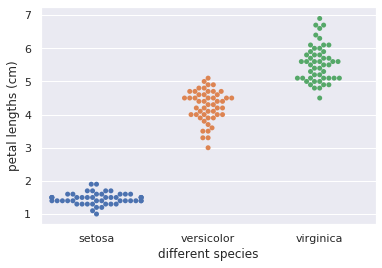

In [11]:
# Create bee swarm plot with Seaborn's default settings
sns.swarmplot(x = 'species',y='petal length (cm)', data = df)
plt.xlabel('different species')
plt.ylabel('petal lengths (cm)')
plt.show()

**Iris virginica petals tend to be the longest, and Iris setosa petals tend to be the shortest of the three species.**

In [0]:
# Plotting Emphirical cumulative distribution

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1,n+1) / n
    return x, y


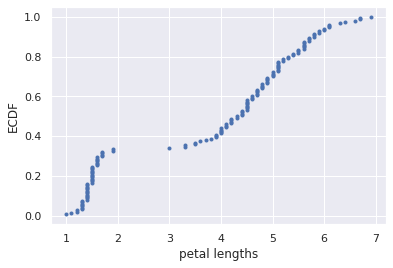

In [13]:
# Compute ECDF for petal length: x_vers, y_vers
x, y = ecdf(df['petal length (cm)'])

# Generate plot
plt.plot(x,y,marker='.',linestyle='none')

# Label the axes
plt.xlabel('petal lengths')
plt.ylabel('ECDF')

# Display the plot
plt.show()


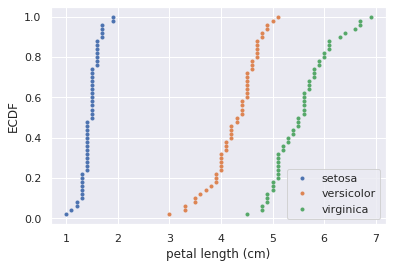

In [14]:
# plotting the ECDF by differentiating species

setosa_petal_length = df[df['species']=='setosa']['petal length (cm)']
versicolor_petal_length = df[df['species']=='versicolor']['petal length (cm)']
virginica_petal_length = df[df['species']=='virginica']['petal length (cm)']

# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot
plt.plot(x_set, y_set,marker='.',linestyle='none')
plt.plot(x_vers,y_vers,marker='.',linestyle='none')
plt.plot(x_virg, y_virg,marker='.',linestyle='none')


# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
plt.xlabel('petal length (cm)')
plt.ylabel('ECDF')

# Display the plot
plt.show()

**The ECDFs expose clear differences among the species. Setosa is much shorter, also with less absolute variability in petal length than versicolor and virginica.**

# **Summary Statistics**

In [15]:
# Compute the mean: mean_length_vers
mean_length_vers = np.mean(versicolor_petal_length)

print('Iris versicolor:', mean_length_vers, 'cm')

I. versicolor: 4.26 cm


In [17]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5,25,50,75,97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length,percentiles)
print('Petal lengths at',percentiles,' percentiles are',ptiles_vers)

Petal lengths at [ 2.5 25.  50.  75.  97.5]  percentiles are [3.3    4.     4.35   4.6    4.9775]


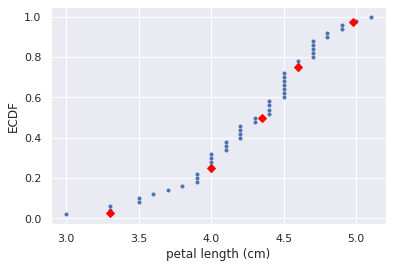

In [18]:
# Plot the ECDF to see the quantiles
plt.plot(x_vers, y_vers, '.')
plt.xlabel('petal length (cm)')
plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',linestyle='none')

plt.show()

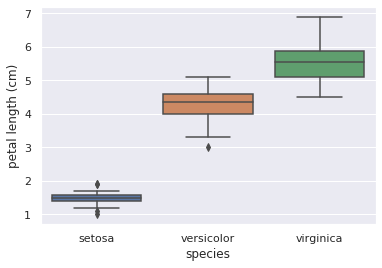

In [19]:
# Create box plot with Seaborn's default settings
sns.boxplot(x='species', y='petal length (cm)', data=df)

plt.xlabel('species')
plt.ylabel('petal length (cm)')
plt.show()

**These box plots shows that the petal length of setosa is the least and virginica is highest**

In [23]:
# Array of differences to mean: differences
differences = versicolor_petal_length - np.mean(versicolor_petal_length)

# Square the differences: diff_sq
diff_sq = [x**2 for x in differences]

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results
print('The actual variance is',variance_np)
print('The calculated variance is',variance_explicit)


The actual variance is 0.21640000000000012
The calculated variance is 0.21640000000000004


In [22]:
# Compute the variance: variance
variance= np.var(versicolor_petal_length)

# Print the square root of the variance
print('The calculated standard deviation is', np.sqrt(variance))

# Print the standard deviation
print('The actual standard deviation is',np.std(versicolor_petal_length))

The calculated standard deviation is 0.4651881339845204
The actual standard deviation is 0.4651881339845204


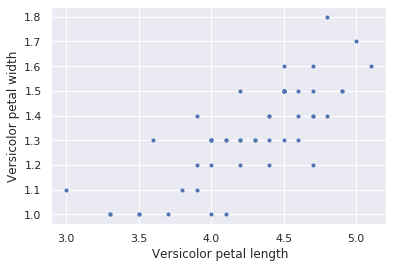

In [26]:
versicolor_petal_width = df[df['species']=='versicolor']['petal width (cm)']
# Make a scatter plot
plt.plot(versicolor_petal_length,versicolor_petal_width,marker='.',linestyle='none')

plt.xlabel(' Versicolor petal length')
plt.ylabel('Versicolor petal width')
plt.show()

**Indeed, we see some correlation. Longer petals also tend to be wider.**

In [30]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print('The covariance matric is: \n', covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0,1]

# Print the length/width covariance
print('The covariance between petal length & width is',petal_cov)


The covariance matric is: 
 [[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
The covariance between petal length & width is 0.07310204081632653


In [31]:
def pearson_r(x, y):
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for Iris versicolor
r = pearson_r(versicolor_petal_width, versicolor_petal_length)

print('The Pearson correlation coefficient between Petal length and width is:',r)

The Pearson correlation coefficient between Petal length and width is: 0.7866680885228169


# **Thinking Probabilistically**
1. Bernouli distribution
2. Binomial distribution
3. Poisson distribution
4. Normal distribution
5. Exponential distribution

# 1. Bernouli distribution

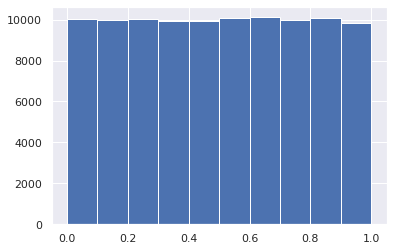

In [32]:
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
plt.hist(random_numbers)
plt.show()

The histogram is almost exactly flat across the top, indicating that there is equal chance that a randomly-generated number is in any of the bins of the histogram.

In [0]:
# Generating bernouli trials

def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number<p:
            n_success+=1

    return n_success


**Problem: How many defaults might we expect?**

For example, Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. You would like to know the probability of getting a given number of defaults, given that the probability of a default is p = 0.05. To investigate this, you will do a simulation. You will perform 100 Bernoulli trials using the perform_bernoulli_trials()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # This is added back by InteractiveShellApp.init_path()


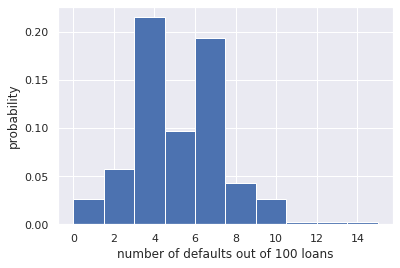

In [35]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)

# Plot the histogram with default number of bins; label your axes
plt.hist(n_defaults, normed=True)
plt.xlabel('number of defaults out of 100 loans')
plt.ylabel('probability')
plt.show()

**Problem:** If interest rates are such that the bank will lose money if 10 or more of its loans are defaulted upon, what is the probability that the bank will lose money?

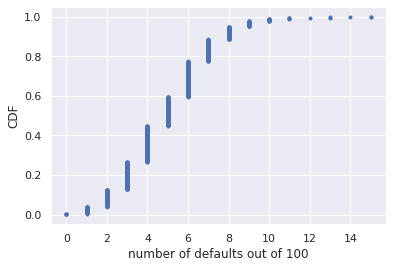

Probability of losing money = 0.022


In [36]:
# Compute ECDF: x, y
x, y = ecdf(n_defaults)

# Plot the CDF with labeled axes
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('number of defaults out of 100')
plt.ylabel('CDF')
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))


We most likely get 5/100 defaults(average). But we still have about a 2% chance of getting 10 or more defaults out of 100 loans.

Instead of simulating all of the Bernoulli trials, perform the sampling using np.random.binomial(). This is identical to the calculation you did previously using your custom-written perform_bernoulli_trials() function, but far more computationally efficient.

# 2. Binomial distribtuion

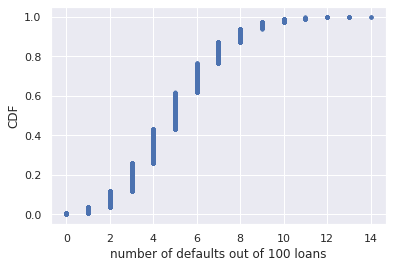

In [37]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(n=100, p=0.05, size=10000)

# Compute CDF: x, y
x, y = ecdf(n_defaults)

plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('number of defaults out of 100 loans')
plt.ylabel('CDF')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


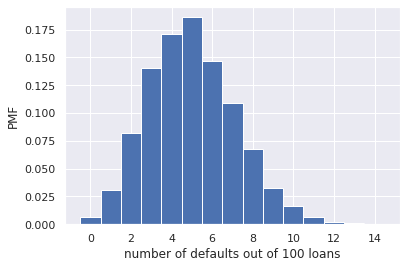

In [38]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
plt.hist(n_defaults, normed=True, bins=bins)
plt.xlabel('number of defaults out of 100 loans')
plt.ylabel('PMF')
plt.show()

# 3. Poisson distribution

**Relationship between Binomial and Poisson**

Exploring the Binomial and poisson distributions computationally. I will compute the mean and standard deviation of samples from a Poisson distribution with an arrival rate of 10. Then, I will compute the mean and standard deviation of samples from a Binomial distribution with parameters n and p such that np=10.

In [40]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, size=10000)

# Print the mean and standard deviation
print('Poisson mean and standard deviation: ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], size=10000)
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),np.std(samples_binomial))


Poisson mean and standard deviation:  10.0045 3.1633020326867305
n = 20 Binom: 9.9846 2.2371774270271905
n = 100 Binom: 9.9512 2.994831975253369
n = 1000 Binom: 10.0644 3.160008329102947


The means are all about the same,the standard deviation of the Binomial distribution gets closer and closer to that of the Poisson distribution as the probability p gets lower and lower. Showing that, **Incase of rare events, binomial approximates poisson distribution**

**Problem : Was 2015 anomalous?**
1990 and 2015 featured the most no-hitters of any season of baseball (there were seven). Given that there are on average 251/115 no-hitters per season, what is the probability of having seven or more in a season?

In [41]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115,size = 10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters>6)

# Compute probability of getting seven or more: p_large
p_large = n_large/10000

print('Probability of seven or more no-hitters:', p_large)


Probability of seven or more no-hitters: 0.0067


The result is about 0.007. This means that it is not that improbable to see a 7-or-more no-hitter season in a century. We have seen two in a century and a half, so it is not unreasonable.

# 4. Normal distribution

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


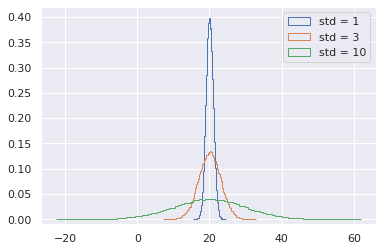

In [42]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20, 1, size=100000)
samples_std3 = np.random.normal(20, 3, size=100000)
samples_std10 = np.random.normal(20, 10, size=100000)

# Make histograms
plt.hist(samples_std1, bins=100, normed=True, histtype='step')
plt.hist(samples_std3, bins=100, normed=True, histtype='step')
plt.hist(samples_std10, bins=100, normed=True, histtype='step')

# Make a legend, set limits and show plot
plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()


You can see how the different standard deviations result in PDFs of different widths. The peaks are all centered at the mean of 20.

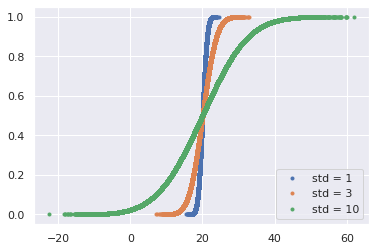

In [43]:
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
plt.plot(x_std1, y_std1, marker='.', linestyle='none')
plt.plot(x_std3, y_std3, marker='.', linestyle='none')
plt.plot(x_std10, y_std10, marker='.', linestyle='none')

# Make a legend and show the plot
plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()


The CDFs all pass through the mean at the 50th percentile; the mean and median of a Normal distribution are equal. The width of the CDF varies with the standard deviation.

**Problem : Are the Belmont Stakes results Normally distributed?**


Since 1926, the Belmont Stakes is a 1.5 mile-long race of 3-year old thoroughbred horses. Secretariat ran the fastest Belmont Stakes in history in 1973. While that was the fastest year, 1970 was the slowest because of unusually wet and sloppy conditions. With these two outliers removed from the data set, compute the mean and standard deviation of the Belmont winners' times. Sample out of a Normal distribution with this mean and standard deviation using the np.random.normal() function and plot a CDF. Overlay the ECDF from the winning Belmont times. Are these close to Normally distributed?

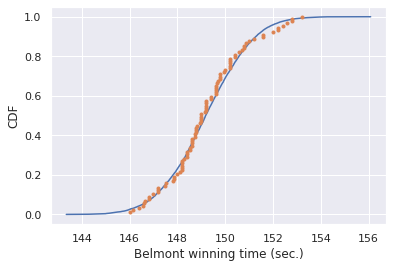

In [46]:
belmont_no_outliers = np.array([148.51, 146.65, 148.52, 150.7 , 150.42, 150.88, 151.57, 147.54,
       149.65, 148.74, 147.86, 148.75, 147.5 , 148.26, 149.71, 146.56,
       151.19, 147.88, 149.16, 148.82, 148.96, 152.02, 146.82, 149.97,
       146.13, 148.1 , 147.2 , 146.  , 146.4 , 148.2 , 149.8 , 147.  ,
       147.2 , 147.8 , 148.2 , 149.  , 149.8 , 148.6 , 146.8 , 149.6 ,
       149.  , 148.2 , 149.2 , 148.  , 150.4 , 148.8 , 147.2 , 148.8 ,
       149.6 , 148.4 , 148.4 , 150.2 , 148.8 , 149.2 , 149.2 , 148.4 ,
       150.2 , 146.6 , 149.8 , 149.  , 150.8 , 148.6 , 150.2 , 149.  ,
       148.6 , 150.2 , 148.2 , 149.4 , 150.8 , 150.2 , 152.2 , 148.2 ,
       149.2 , 151.  , 149.6 , 149.6 , 149.4 , 148.6 , 150.  , 150.6 ,
       149.2 , 152.6 , 152.8 , 149.6 , 151.6 , 152.8 , 153.2 , 152.4 ,
       152.2 ])
# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)

# Plot the CDFs and show the plot
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('Belmont winning time (sec.)')
plt.ylabel('CDF')
plt.show()


The theoretical CDF and the ECDF of the data suggest that the winning Belmont times are, indeed, Normally distributed. This also suggests that in the last 100 years or so, there have not been major technological or training advances that have significantly affected the speed at which horses can run this race.

**Problem : What are the chances of a horse matching or beating Secretariat's record?**

Assume that the Belmont winners' times are Normally distributed (with the 1970 and 1973 years removed), what is the probability that the winner of a given Belmont Stakes will run it as fast or faster than Secretariat?

In [47]:
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, size=1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(samples <= 144) / len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)

Probability of besting Secretariat: 0.000603


We had to take a million samples because the probability of a fast time is very low and we had to be sure to sample enough. We get that there is only a 0.06% chance of a horse running the Belmont as fast as Secretariat.

# 5. Exponential distribution

**Time between No-hitter and a hit of the cycle?**
we looked at the rare event of no-hitters in Major League Baseball. Hitting the cycle is another rare baseball event. When a batter hits the cycle, he gets all four kinds of hits, a single, double, triple, and home run, in a single game. Like no-hitters, this can be modeled as a Poisson process, so the time between hits of the cycle are also Exponentially distributed.

In [0]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size=size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size=size)

    return t1 + t2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


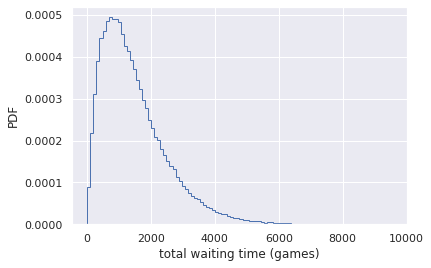

In [49]:
# Draw samples of waiting times
waiting_times = successive_poisson(764, 715, size=100000)

# Make the histogram
plt.hist(waiting_times, bins=100, histtype='step',
             normed=True)
plt.xlabel('total waiting time (games)')
plt.ylabel('PDF')
plt.show()

The PDF is peaked, unlike the waiting time for a single Poisson process.

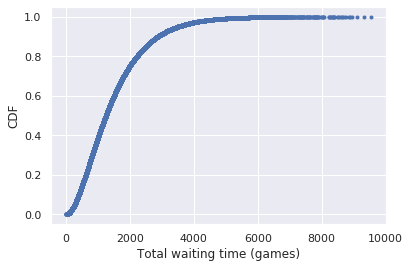

In [50]:
x, y = ecdf(waiting_times)
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('Total waiting time (games)')
plt.ylabel('CDF')
plt.show()